<a href="https://colab.research.google.com/github/ksejull/labs/blob/main/%D0%9B%D0%A07_%D0%9B%D1%83%D1%87%D0%B0%D0%BD%D1%96%D0%BD%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лучанінова Ксенія, Варіант 11, Група 2-8

#Лабораторна робота №7

f(1.416) = 0.8882224592474107
f(1.431) = 0.8918095572774912
f(1.422) = 0.8900329235365888
f(1.456) = 0.8968518438182911
f(1.462) = 0.8975780814143483
f(1.451) = 0.8957677002637311


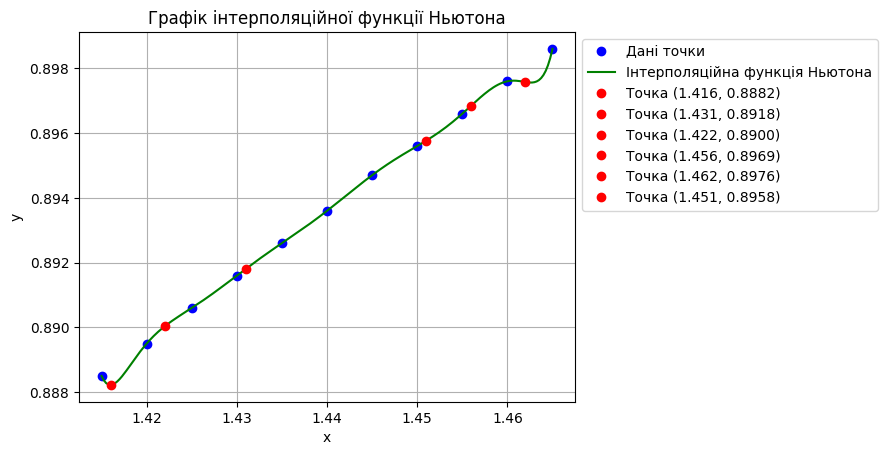

In [ ]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

# Задані точки з таблиці
x = np.array([1.415, 1.420, 1.425, 1.430, 1.435, 1.440, 1.445, 1.450, 1.455, 1.460, 1.465])
y = np.array([0.8885, 0.8895, 0.8906, 0.8916, 0.8926, 0.8936, 0.8947, 0.8956, 0.8966, 0.8976, 0.8986])

# Перша інтерполяційна формула Ньютона (інтерполяція вперед)
def newton_forward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок між вузлами

    # Обчислення кінцевих різниць
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j - 1]

    # Обчислення значення q
    q = (x0 - x[0]) / h

    # Використання формули Ньютона для інтерполяції вперед
    ans = delta_y[0, 0]
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q - i + 1)  # Обчислення добутку q*(q-1)*(q-2)*...*(q-i+1)
        ans += (q_prod * delta_y[0, i]) / factorial(i)

    return ans

# Друга інтерполяційна формула Ньютона (інтерполяція назад)
def newton_backward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок між вузлами

    # Обчислення кінцевих різниць
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j - 1]

    # Обчислення значення q
    q = (x0 - x[-1]) / h

    # Використання формули Ньютона для інтерполяції назад
    ans = delta_y[-1, 0]  # Починаємо з y_n
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q + i - 1)  # Обчислення добутку q*(q+1)*(q+2)*...*(q+i-1)
        ans += (q_prod * delta_y[n - i - 1, i]) / factorial(i)

    return ans

# Значення аргументів з таблиці: 1.416, 1.431, 1.422, 1.456, 1.462, 1.451
x_values = [1.416, 1.431, 1.422, 1.456, 1.462, 1.451]

# Обчислення значення функції в цих точках і зберігаємо їх
calculated_points = []
for x0 in x_values:
    if x0 <= x[len(x) // 2]:
        y0 = newton_forward_interpolation(x, y, x0)
    else:
        y0 = newton_backward_interpolation(x, y, x0)
    calculated_points.append((x0, y0))
    print(f"f({x0}) = {y0}")

# Побудова графіка інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 200)  # Збільшила кількість точок для графіку
yy = np.zeros_like(xx)

for i in range(len(xx)):
    if xx[i] <= x[len(x) // 2]:
        yy[i] = newton_forward_interpolation(x, y, xx[i])
    else:
        yy[i] = newton_backward_interpolation(x, y, xx[i])

# Побудова графіку
plt.plot(x, y, 'o', label='Дані точки', color='blue')  # Сині дані
plt.plot(xx, yy, label="Інтерполяційна функція Ньютона", color='green')  # Зелений графік

# Окремо наносимо обчислені точки червоними маркерами
for x0, y0 in calculated_points:
    plt.plot(x0, y0, 'ro', label=f'Точка ({x0}, {y0:.4f})')

plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")

# Легенда поза межами графіку
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.show()
